# Yolo 8 food detection

In [1]:
# !pip install ultralytics

In [2]:
from ultralytics import YOLO
import numpy as np
import os
from PIL import Image
import pandas as pd
import torch as torch

In [3]:
if torch.cuda.is_available():
    cuda_id = torch.cuda.current_device()
    device_name = torch.cuda.get_device_name(cuda_id)
    device = "cuda:0"
else:
    device = "cpu"

In [4]:
# Load a pretrained YOLO model
model = YOLO("yolov8m.pt").to(device)

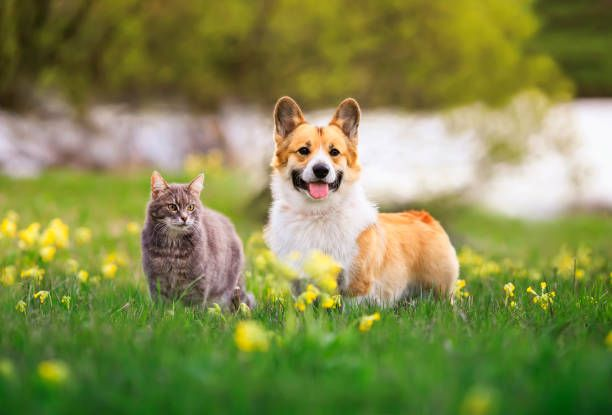

In [5]:
cat_dog = Image.open("cat_dog.jpg")
cat_dog = np.asarray(cat_dog)
Image.fromarray(cat_dog)

In [6]:
cat_dog.shape

(415, 612, 3)

In [7]:
result = model.predict(cat_dog)


0: 448x640 1 cat, 1 dog, 77.3ms
Speed: 3.0ms preprocess, 77.3ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)


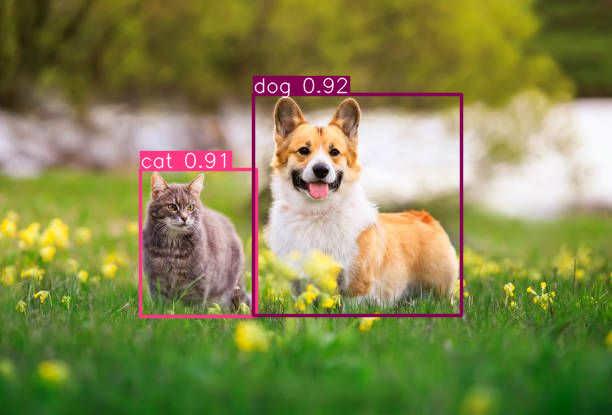

In [8]:
Image.fromarray(result[0].plot())

In [9]:
names = pd.read_csv("oidv7-class-descriptions-boxable.csv")
translate_dict = {}
for row in names.iterrows():
    translate_dict[row[1]["LabelName"]] = row[1]["DisplayName"]

translate_dict["/m/02wbm"]

'Food'

In [10]:
if not os.path.exists("datasets/train_images"):
    os.mkdir("datasets/train_images")
if not os.path.exists("datasets/valid_images"):
    os.mkdir("datasets/valid_images")
if not os.path.exists("datasets/test_images"):
    os.mkdir("datasets/test_images")

In [11]:
annotations_train = pd.read_csv("oidv6-train-annotations-bbox.csv")
annotations_train["DisplayName"] = annotations_train["LabelName"].map(translate_dict)
annotations_train = annotations_train[annotations_train["DisplayName"] == "Food"]

food_train = annotations_train["ImageID"]
food_train = food_train.drop_duplicates()[:4000]

train_data = pd.merge(food_train, annotations_train, on="ImageID", how="inner")[
    ["ImageID", "XMin", "XMax", "YMin", "YMax"]
]

for image in food_train:
    name = "datasets/train_images/" + image + ".txt"
    if os.path.exists(name):
        os.remove(name)
    with open(name, "w", encoding="utf-8") as file:
        for row in train_data.loc[train_data["ImageID"] == image].iterrows():
            xmin, xmax, ymin, ymax = (
                row[1]["XMin"],
                row[1]["XMax"],
                row[1]["YMin"],
                row[1]["YMax"],
            )
            xcenter, ycenter = (xmin + xmax) / 2, (ymin + ymax) / 2
            width, height = xmax - xmin, ymax - ymin
            file.write(
                "80 "
                + str(xcenter)
                + " "
                + str(ycenter)
                + " "
                + str(width)
                + " "
                + str(height)
                + "\n"
            )

In [12]:
annotations_valid = pd.read_csv("validation-annotations-bbox.csv")
annotations_valid["DisplayName"] = annotations_valid["LabelName"].map(translate_dict)
annotations_valid = annotations_valid[annotations_valid["DisplayName"] == "Food"]

food_valid = annotations_valid["ImageID"]
food_valid = food_valid.drop_duplicates()[:1000]

valid_data = pd.merge(food_valid, annotations_valid, on="ImageID", how="inner")[
    ["ImageID", "XMin", "XMax", "YMin", "YMax"]
]

for image in food_valid:
    name = "datasets/valid_images/" + image + ".txt"
    if os.path.exists(name):
        os.remove(name)
    with open(name, "w", encoding="utf-8") as file:
        for row in valid_data.loc[valid_data["ImageID"] == image].iterrows():
            xmin, xmax, ymin, ymax = (
                row[1]["XMin"],
                row[1]["XMax"],
                row[1]["YMin"],
                row[1]["YMax"],
            )
            xcenter, ycenter = (xmin + xmax) / 2, (ymin + ymax) / 2
            width, height = xmax - xmin, ymax - ymin
            file.write(
                "80 "
                + str(xcenter)
                + " "
                + str(ycenter)
                + " "
                + str(width)
                + " "
                + str(height)
                + "\n"
            )

In [13]:
annotations_test = pd.read_csv("test-annotations-bbox.csv")
annotations_test["DisplayName"] = annotations_test["LabelName"].map(translate_dict)
annotations_test = annotations_test[annotations_test["DisplayName"] == "Food"]

food_test = annotations_test["ImageID"]
food_test = food_test.drop_duplicates()[:1000]

test_data = pd.merge(food_test, annotations_test, on="ImageID", how="inner")[
    ["ImageID", "XMin", "XMax", "YMin", "YMax"]
]

for image in food_test:
    name = "datasets/test_images/" + image + ".txt"
    if os.path.exists(name):
        os.remove(name)
    with open(name, "w", encoding="utf-8") as file:
        for row in test_data.loc[test_data["ImageID"] == image].iterrows():
            xmin, xmax, ymin, ymax = (
                row[1]["XMin"],
                row[1]["XMax"],
                row[1]["YMin"],
                row[1]["YMax"],
            )
            xcenter, ycenter = (xmin + xmax) / 2, (ymin + ymax) / 2
            width, height = xmax - xmin, ymax - ymin
            file.write(
                "80 "
                + str(xcenter)
                + " "
                + str(ycenter)
                + " "
                + str(width)
                + " "
                + str(height)
                + "\n"
            )

In [14]:
training_list_file = "training_download.txt"
if os.path.exists(training_list_file):
    os.remove(training_list_file)
with open(training_list_file, "w", encoding="utf-8") as to_download:
    for image in food_train:
        to_download.write("train/" + image + "\n")


validate_list_file = "validate_download.txt"
if os.path.exists(validate_list_file):
    os.remove(validate_list_file)
with open(validate_list_file, "w", encoding="utf-8") as to_download:
    for image in food_valid:
        to_download.write("validation/" + image + "\n")


testing_list_file = "testing_download.txt"
if os.path.exists(testing_list_file):
    os.remove(testing_list_file)
with open(testing_list_file, "w", encoding="utf-8") as to_download:
    for image in food_test:
        to_download.write("test/" + image + "\n")

In [15]:
# !python downloader.py training_download.txt --download_folder=datasets/train_images --num_processes=20

In [16]:
# !python downloader.py validate_download.txt --download_folder=datasets/valid_images --num_processes=20

In [17]:
# !python downloader.py testing_download.txt --download_folder=datasets/test_images --num_processes=20

In [18]:
results = model.train(data="food_v8.yaml", epochs=10)

New https://pypi.org/project/ultralytics/8.0.208 available  Update with 'pip install -U ultralytics'
engine\trainer: task=detect, mode=train, model=yolov8m.pt, data=food_v8.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, opt

In [24]:
model = YOLO("./runs/detect/train/weights/best.pt").to(device)

In [27]:
test_dir = "datasets/test_images"
names = [name for name in os.listdir(test_dir) if name[-4:] != ".txt"]
test_images = [
    np.asarray(Image.open(test_dir + "/" + name).convert("RGB")) for name in names
]
predictions = [model.predict(img, classes=[80]) for img in test_images]


0: 480x640 2 Foods, 120.6ms
Speed: 4.0ms preprocess, 120.6ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 99.7ms
Speed: 2.0ms preprocess, 99.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 640x640 1 Food, 9.0ms
Speed: 2.0ms preprocess, 9.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 1 Food, 8.0ms
Speed: 1.0ms preprocess, 8.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Food, 9.0ms
Speed: 1.0ms preprocess, 9.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Food, 8.0ms
Speed: 1.0ms preprocess, 8.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 448x640 1 Food, 11.0ms
Speed: 1.0ms preprocess, 11.0ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)

0: 480x640 1 Food, 8.0ms
Speed: 1.0ms preprocess, 8.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 64

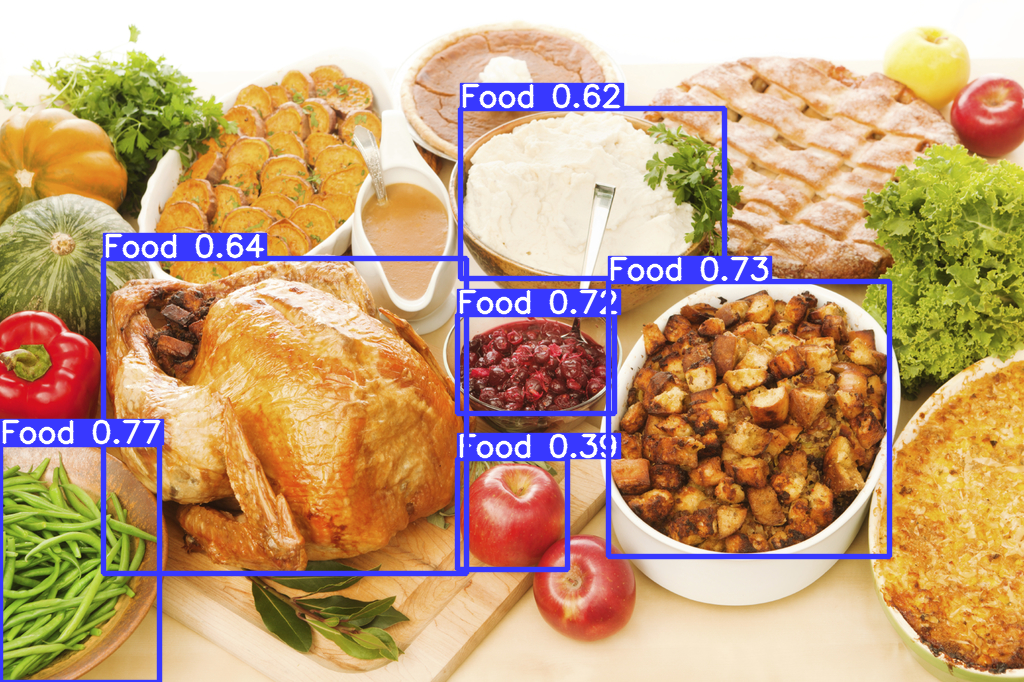

In [30]:
Image.fromarray(predictions[997][0].plot())

In [41]:
predictions[997][0].boxes.xyxy

tensor([[  0.0000, 444.8192, 159.1263, 682.0000],
        [608.2267, 281.6601, 889.3146, 556.7195],
        [457.1348, 314.2810, 614.1779, 413.4720],
        [103.5272, 258.6352, 466.1849, 573.2074],
        [460.9390, 108.0018, 724.2591, 278.5976],
        [457.7597, 458.6150, 567.9541, 569.3926]], device='cuda:0')

In [42]:
from PIL import ImageFilter

In [91]:
def blur(image, model):
    pred = model.predict(np.asarray(image), classes=[80])
    boxes = pred[0].boxes.xyxy
    for box in boxes:
        box = box.to(int).tolist()
        ic = image.crop(box)
        for i in range(
            10
        ):  # with the BLUR filter, you can blur a few times to get the effect you're seeking
            ic = ic.filter(ImageFilter.BLUR)
        image.paste(ic, box)
    return np.asarray(image)


0: 448x640 11 Foods, 79.7ms
Speed: 12.0ms preprocess, 79.7ms inference, 4.0ms postprocess per image at shape (1, 3, 448, 640)


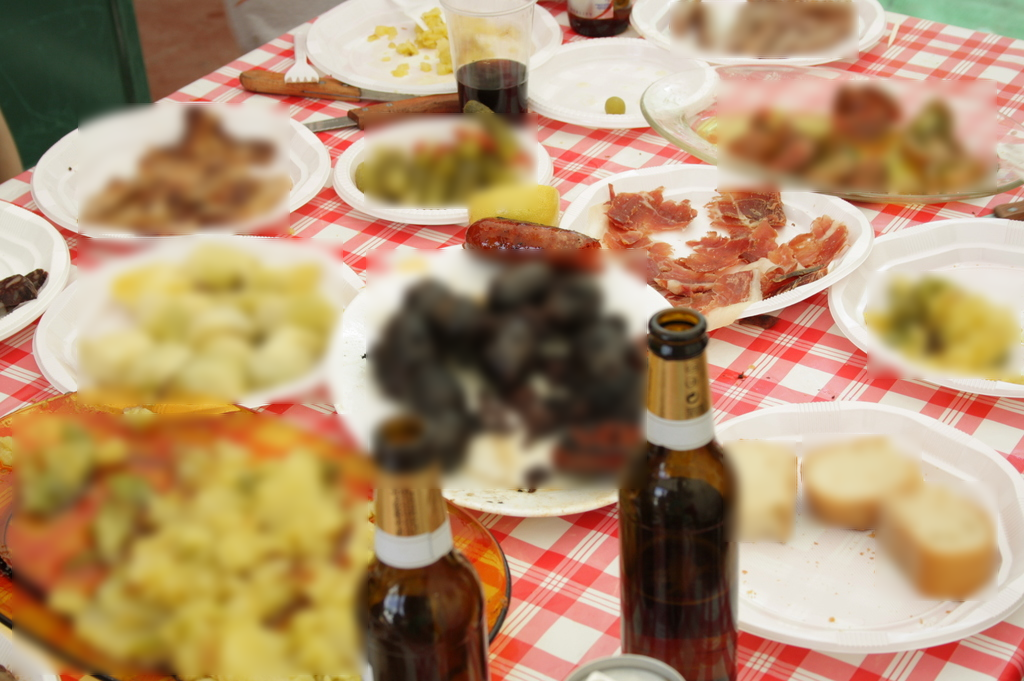

In [92]:
im = Image.open(test_dir + "/" + names[942]).convert("RGB")
im = blur(im, model)
Image.fromarray(im)


0: 448x640 6 Foods, 51.8ms
Speed: 2.0ms preprocess, 51.8ms inference, 3.0ms postprocess per image at shape (1, 3, 448, 640)


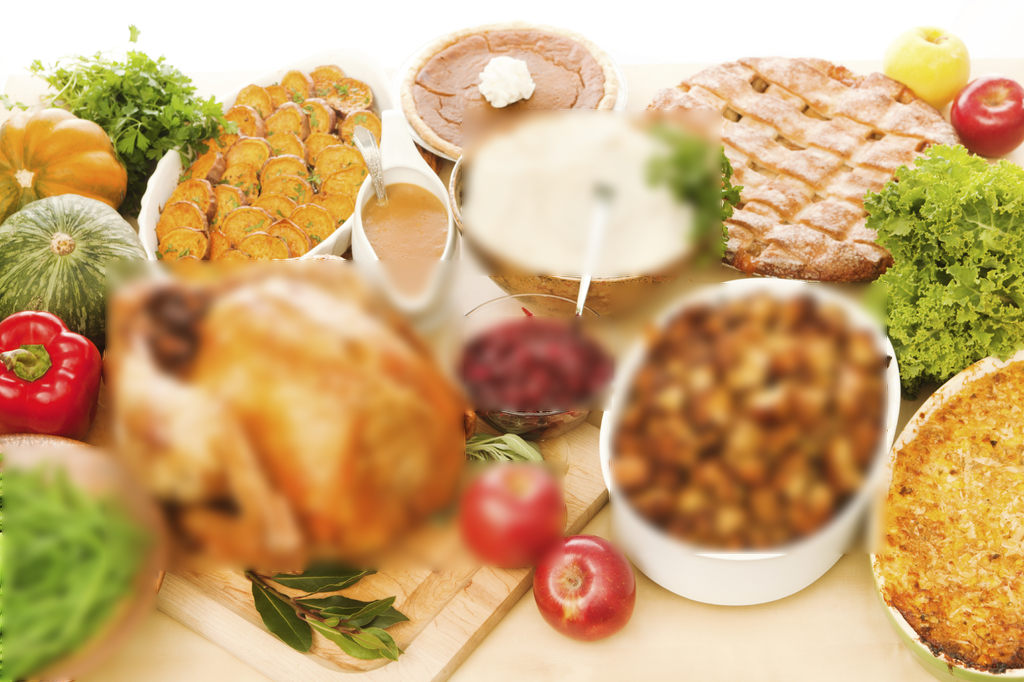

In [93]:
im = Image.open(test_dir + "/" + names[997]).convert("RGB")
im = blur(im, model)
Image.fromarray(im)